<a href="https://colab.research.google.com/github/fazalpge/product_forecasting/blob/main/Prophet_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Import Libraries

In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

Read DataSet

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/fazalpge/product_forecasting/main/Inventory%20Data_fazal.csv')



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionDate          1807 non-null   object 
 1   Location                 1807 non-null   object 
 2   ItemName                 1807 non-null   object 
 3   Cost                     1807 non-null   int64  
 4   SaleQty                  1807 non-null   int64  
 5   SaleBonusQty             1807 non-null   int64  
 6   SaleTotalQty             1807 non-null   int64  
 7   MRP                      1807 non-null   int64  
 8   SaleAmount               1807 non-null   int64  
 9   PerInvoiceAverageAmount  1807 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 141.3+ KB


In [24]:
df.head()

,TransactionDate,Location,ItemName,Cost,SaleQty,SaleBonusQty,SaleTotalQty,MRP,SaleAmount,PerInvoiceAverageAmount
0,25-Oct-23,Brahmaputra,Clean 100ml,250,50,4,54,940,47000,44439.81
1,25-Oct-23,Brahmaputra,Clean 100ml,250,10,0,10,940,9400,12013.21
2,22-Oct-23,Brahmaputra,Clean 100ml,250,20,1,21,940,18800,92327.94
3,21-Oct-23,Brahmaputra,Clean 100ml,250,6,0,6,940,5640,16732.52
4,19-Oct-23,Brahmaputra,Clean 100ml,250,20,1,21,940,18800,11170.89


In [25]:
df=df[["TransactionDate","SaleQty"]]
df.head()

,TransactionDate,SaleQty
0,25-Oct-23,50
1,25-Oct-23,10
2,22-Oct-23,20
3,21-Oct-23,6
4,19-Oct-23,20


# Change Column Names for FB Prophet

In [26]:
df.columns = ['ds','y']

In [27]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-27-df3eb660f625>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
1802,2022-04-23,60
1803,2022-11-24,0
1804,2022-04-23,20
1805,2022-04-22,28
1806,2022-04-22,60


# Plot Your Data

<Axes: xlabel='ds'>

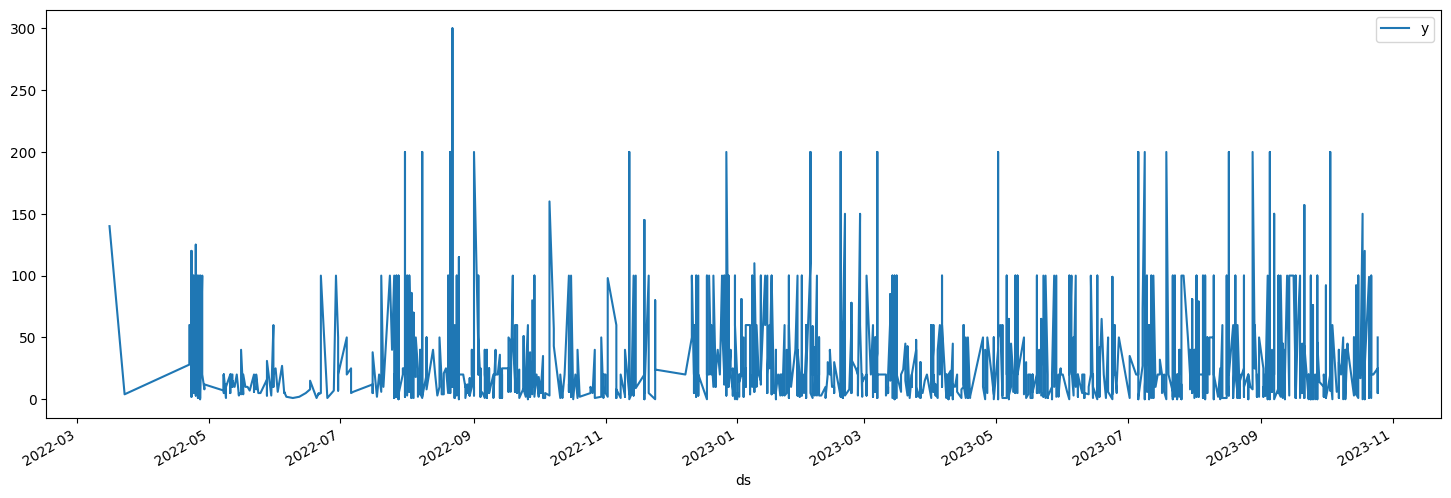

In [28]:
df.plot(x='ds',y='y',figsize=(18,6))

In [30]:
len(df)

1807

# Train, Test Split

In [31]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

# Start Making Predictions

In [32]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6hs37f0s/ab1hi9ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6hs37f0s/nwh6eio9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44521', 'data', 'file=/tmp/tmp6hs37f0s/ab1hi9ff.json', 'init=/tmp/tmp6hs37f0s/nwh6eio9.json', 'output', 'file=/tmp/tmp6hs37f0s/prophet_model4rulszmp/prophet_model-20240518113157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
733,2024-10-20,25.125487,-14.862318,74.584864,25.040769,25.201905,1.930269,1.930269,1.930269,1.930269,1.930269,1.930269,0.0,0.0,0.0,27.055756
734,2024-10-21,25.122448,-17.514202,71.336731,25.037489,25.199068,2.506036,2.506036,2.506036,2.506036,2.506036,2.506036,0.0,0.0,0.0,27.628485
735,2024-10-22,25.119410,-16.788647,72.157739,25.034210,25.196433,0.847268,0.847268,0.847268,0.847268,0.847268,0.847268,0.0,0.0,0.0,25.966677
736,2024-10-23,25.116371,-16.626388,68.296798,25.030932,25.193799,0.648403,0.648403,0.648403,0.648403,0.648403,0.648403,0.0,0.0,0.0,25.764773
737,2024-10-24,25.113332,-17.258247,77.592534,25.027650,25.191142,2.231610,2.231610,2.231610,2.231610,2.231610,2.231610,0.0,0.0,0.0,27.344942


In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
733,2024-10-20,27.055756,-14.862318,74.584864
734,2024-10-21,27.628485,-17.514202,71.336731
735,2024-10-22,25.966677,-16.788647,72.157739
736,2024-10-23,25.764773,-16.626388,68.296798
737,2024-10-24,27.344942,-17.258247,77.592534


In [35]:
test.tail()

,ds,y
1802,2022-04-23,60
1803,2022-11-24,0
1804,2022-04-23,20
1805,2022-04-22,28
1806,2022-04-22,60


# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [36]:
plot_plotly(m ,forecast)

In [38]:
plot_components_plotly(m, forecast)

# Evaluate Your Model

In [39]:
from statsmodels.tools.eval_measures import rmse

In [40]:
predictions = forecast.iloc[-365:]['yhat']

In [41]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  29.95260480485437
Mean Value of Test Dataset: 26.18904109589041
